In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
gc = pd.read_csv('/content/nigerian_spotify_songs1.csv')

In [40]:
gc.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [14]:
gc.artist.value_counts()

Various Artists    37
Flavour            19
P-Square           18
WizKid             18
DaVido             17
                   ..
Pheelz              1
Tjan                1
E.L                 1
Julz                1
BM                  1
Name: artist, Length: 171, dtype: int64

In [9]:
gc.shape

(530, 16)

In [5]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [6]:
gc.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [7]:
gc.isna().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [41]:
gc = gc.drop_duplicates()

In [42]:
gc.shape

(530, 16)

In [11]:
gc.dtypes

name                 object
album                object
artist               object
artist_top_genre     object
release_date          int64
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

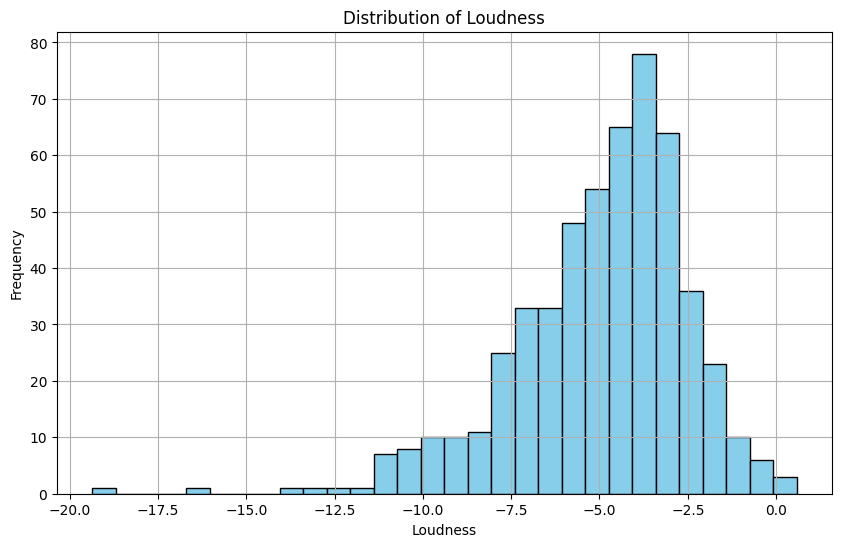

In [61]:
loudness_data = gc['loudness']

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(loudness_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
label_encoder = LabelEncoder()

In [47]:
gc['name']= label_encoder.fit_transform(gc['name'])

In [48]:
gc['album']= label_encoder.fit_transform(gc['album'])

In [49]:
gc['artist_top_genre']= label_encoder.fit_transform(gc['artist_top_genre'])

In [52]:
gc['artist']= label_encoder.fit_transform(gc['artist'])

In [53]:
gc.artist_top_genre.value_counts()

1     328
3      90
0      53
16     24
7       8
5       7
14      4
2       3
15      3
11      1
4       1
8       1
18      1
13      1
12      1
10      1
17      1
6       1
9       1
Name: artist_top_genre, dtype: int64

In [54]:
x = gc.drop(['artist_top_genre', 'loudness', 'length', 'release_date'], axis =1).values
y = gc['artist_top_genre'].values

In [55]:
x


array([[4.15000e+02, 2.38000e+02, 2.20000e+01, ..., 8.29000e-02,
        1.33015e+02, 5.00000e+00],
       [4.94000e+02, 1.24000e+02, 9.90000e+01, ..., 3.60000e-01,
        1.29993e+02, 3.00000e+00],
       [2.37000e+02, 2.15000e+02, 2.00000e+00, ..., 4.24000e-02,
        1.30005e+02, 4.00000e+00],
       ...,
       [2.48000e+02, 3.40000e+01, 5.40000e+01, ..., 6.68000e-02,
        1.21058e+02, 4.00000e+00],
       [1.54000e+02, 3.40000e+01, 5.40000e+01, ..., 2.34000e-01,
        1.23997e+02, 4.00000e+00],
       [2.56000e+02, 3.40000e+01, 5.40000e+01, ..., 1.39000e-01,
        1.06972e+02, 4.00000e+00]])

In [56]:
y

array([ 5,  3, 14, 16,  3, 16, 16,  3, 16,  5,  5,  3,  5, 16,  5, 16, 14,
        3,  5,  2,  3, 14, 16,  3, 16, 14,  3, 16,  5, 16,  3,  3,  3,  3,
        1,  1,  1,  1,  1, 16,  3,  1,  1,  1,  1,  1,  3,  0, 16,  3,  1,
        1,  1,  3,  1,  3,  1,  3,  1,  1,  3,  1,  1,  1,  6,  1,  1,  3,
        1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1, 16,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  3, 17,  1,  3,  1,  1,  1,
        1,  0,  3,  0,  3,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,  1,  1,
        1, 13,  3,  1,  1,  1,  1,  3,  1,  1,  3, 10,  1,  1,  1, 15,  0,
        1,  1,  1,  0,  1,  1,  1,  1,  3,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  0,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        0,  3,  1,  1,  1,  1,  1,  3,  1,  0,  1,  1,  1,  3,  3,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,  0,  1,
        1,  0,  3,  3,  1

In [57]:
scaler = StandardScaler()


x = scaler.fit_transform(x)

In [58]:
x

array([[ 1.14790297,  0.21049689, -1.40594987, ..., -0.51532247,
         0.70339004,  3.03914122],
       [ 1.69860073, -0.7072562 ,  0.1540081 , ...,  2.46902286,
         0.57477461, -2.95990849],
       [-0.0929097 ,  0.02533618, -1.81113376, ..., -0.9515043 ,
         0.57528532,  0.03961637],
       ...,
       [-0.01623026, -1.43179812, -0.75765565, ..., -0.68871821,
         0.19450364,  0.03961637],
       [-0.67149088, -1.43179812, -0.75765565, ...,  1.11201271,
         0.31958661,  0.03961637],
       [ 0.0395366 , -1.43179812, -0.75765565, ...,  0.08887014,
        -0.40499238,  0.03961637]])

In [59]:
y

array([ 5,  3, 14, 16,  3, 16, 16,  3, 16,  5,  5,  3,  5, 16,  5, 16, 14,
        3,  5,  2,  3, 14, 16,  3, 16, 14,  3, 16,  5, 16,  3,  3,  3,  3,
        1,  1,  1,  1,  1, 16,  3,  1,  1,  1,  1,  1,  3,  0, 16,  3,  1,
        1,  1,  3,  1,  3,  1,  3,  1,  1,  3,  1,  1,  1,  6,  1,  1,  3,
        1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1, 16,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  3, 17,  1,  3,  1,  1,  1,
        1,  0,  3,  0,  3,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,  1,  1,
        1, 13,  3,  1,  1,  1,  1,  3,  1,  1,  3, 10,  1,  1,  1, 15,  0,
        1,  1,  1,  0,  1,  1,  1,  1,  3,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  0,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        0,  3,  1,  1,  1,  1,  1,  3,  1,  0,  1,  1,  1,  3,  3,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,  0,  1,
        1,  0,  3,  3,  1

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=80)

In [82]:
from sklearn.metrics import accuracy_score
import sklearn.metrics

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [121]:
y_pred = model.predict(x_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6236559139784946


<Axes: xlabel='Predicted', ylabel='Actual'>

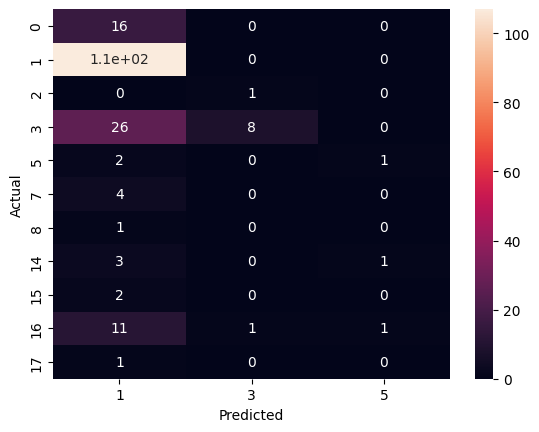

In [123]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [125]:
import pickle

pickle.dump(model, open ('model.sav', 'wb'))